In [37]:
import pandas as pd
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Grab data from csv file

In [4]:
sheet = pd.read_csv('./preprocessed_data.csv')

In [5]:
sheet.head()

,0,1,2,3,4,5,6,7,8,9,...,5151,5152,5153,5154,5155,5156,5157,5158,5159,class
0,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,-60.876125,...,5.140539,3.180239,-1.843062,-14.799632,1.048248,2.937207,-60.876125,3.098228,4.940719,0
1,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,-60.718200,...,-60.718200,-60.718200,-60.718200,-2.394113,-60.718200,-4.563484,-60.718200,-60.718200,-3.347412,0
2,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,-61.212837,...,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,-39.487180,0
3,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,-61.600650,...,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,-39.952940,0
4,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,-61.072853,...,-5.162120,-18.417093,0.573289,2.564047,3.433276,-3.935794,-8.080255,-61.072853,-39.713818,0


Train-Test Split

In [12]:
X_full = sheet.iloc[:, :-1]
Y_full = sheet.iloc[:,-1:].values

In [14]:
X_full.shape

(6678, 5160)

In [13]:
Y_full.shape

(6678, 1)

#### Dimensionality Reduction

##### PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=0.95)
X_full_pca = pca.fit_transform(X_full)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_full_pca, Y_full, test_size=0.15, random_state=42)

In [29]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

X_train:  (5676, 2669)
X_test:  (1002, 2669)
Y_train:  (5676, 1)
Y_test:  (1002, 1)


### K-Nearest Neighbor (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

#### 1-NN

In [30]:
knn = KNeighborsClassifier(n_neighbors=1, metric="euclidean")
knn.fit(X_train, Y_train) 

/Users/nicholascaro/opt/anaconda3/envs/hello-tf/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [31]:
Y_predict = knn.predict(X_test)

Classification Report and Confusion Matrix for 1-NN

In [34]:
target_names = ['indian', 'malayalam', 'australian', 'odiya', 'welsh', 'telugu', 'bangla', 'british', 'american']
print(classification_report(Y_test, Y_predict, target_names=target_names))
print(confusion_matrix(Y_test, Y_predict))

              precision    recall  f1-score   support

      indian       0.66      0.96      0.78       122
   malayalam       0.85      0.73      0.78       100
  australian       0.85      0.82      0.84       106
       odiya       0.88      0.96      0.92       118
       welsh       0.94      0.92      0.93       115
      telugu       0.96      0.80      0.87       111
      bangla       0.87      1.00      0.93       123
     british       0.81      0.78      0.79       118
    american       0.85      0.44      0.58        89

    accuracy                           0.84      1002
   macro avg       0.85      0.82      0.82      1002
weighted avg       0.85      0.84      0.83      1002

[[117   0   2   0   1   0   0   2   0]
 [  2  73   0   9   0   4  12   0   0]
 [  8   0  87   0   2   0   0   5   4]
 [  0   3   0 113   0   0   2   0   0]
 [  3   0   4   0 106   0   0   1   1]
 [  2  10   0   5   0  89   5   0   0]
 [  0   0   0   0   0   0 123   0   0]
 [ 22   0   1   0   1 

#### KNN with different K Values

In [ ]:
accuracy_list = list()
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, Y_train)   
    accuracy_list.append((knn.score(X_test, Y_test)*100))



Text(0, 0.5, 'Accuracy Rate')

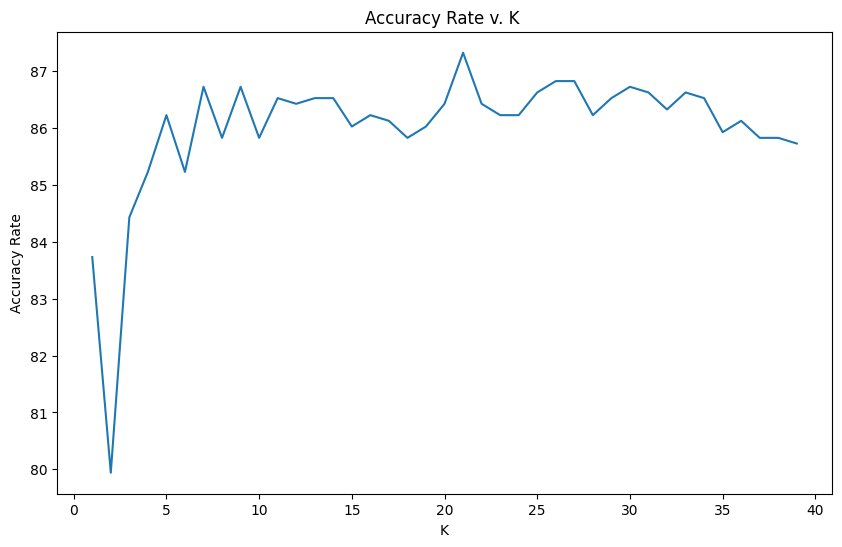

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_list)
plt.title('Accuracy Rate v. K ')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')